<a href="https://colab.research.google.com/github/flaviofogaca/PyProjects/blob/master/RID88289_Desafio06_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Etapa 01: Análise Exploratória dos Dados (Data Understanding)**

a. Carregar a base de dados

Vamos carregar a base de dados para começarmos a análise.

In [ ]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv('/content/streaming_data.csv')

# Visualizar as primeiras linhas do dataframe
print(df.head())


    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0                3.0             Basic   
1  69.0  Female            6107.0                2.0          Standard   
2  44.0    Male            6374.0                3.0           Premium   
3  26.0    Male               NaN                5.0             Basic   
4  18.0     NaN            1948.0                3.0             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
0                     NaN                    3         NaN      0.0   
1                     NaN                    1        2.14      0.0   
2                     1.0                    1        1.91      1.0   
3                     NaN                    2         NaN      NaN   
4                     NaN                    3        3.88      0.0   

                                User_id  
0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4  
1  fe14b048-770b-4619-8ec6-485b0969ae31  
2 

b. Descrição estatística dos dados

Vamos realizar uma descrição estatística dos dados para entender melhor suas características.

In [ ]:
# Descrição estatística dos dados
print(df.describe())


                Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120700             1.413235      1.154963      0.428938  
min                  1.000000             1.000000      1.000000      0.000000  
25%                  1.000000             2.000000    

c. Verificação dos tipos de dados

Vamos verificar os tipos de dados para garantir que estão corretos.

In [ ]:
# Verificação dos tipos de dados
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB
None


d. Verificação da quantidade de valores faltantes

Vamos verificar a quantidade de valores faltantes nas colunas.

In [ ]:
# Verificação da quantidade de valores faltantes
print(df.isna().sum())


Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


**Etapa 02: Tratamento dos Dados (Data Preparation)**

a. Substituir valores "NaN" por 0

Vamos substituir valores NaN por 0 nas colunas especificadas.

In [ ]:
# Substituir valores NaN por 0 nas colunas específicas
df['Time_on_platform'] = df['Time_on_platform'].fillna(0)
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(0)
df['Churned'] = df['Churned'].fillna(0)
df['Avg_rating'] = df['Avg_rating'].fillna(0)
df['Devices_connected'] = df['Devices_connected'].fillna(0)


b. Dropar linhas nulas

Vamos dropar linhas nulas nas colunas Gender, Subscription_type e Age.

In [ ]:
# Dropar linhas nulas nas colunas especificadas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])



c. Transformando valores Churned 0 e 1 por No e Yes

Vamos transformar os valores da coluna Churned de 0 e 1 para "No" e "Yes".

In [ ]:
# Transformando valores de Churned
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


<ipython-input-7-225b9b210feb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


d. Transformando valores floats em valores inteiros

Vamos transformar os valores float em valores inteiros.

In [ ]:
# Transformando valores float em valores inteiros
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_active_profiles'] = df['Num_active_profiles'].astype(int)


<ipython-input-8-cbfe4f371450>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
<ipython-input-8-cbfe4f371450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_on_platform'] = df['Time_on_platform'].astype(int)
<ipython-input-8-cbfe4f371450>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

**Etapa 03: Modelagem dos Dados - Regressão Logística**

a. Definir variáveis X e y para o modelo

Vamos começar definindo as variáveis independentes (X) e a variável dependente (y).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Definir variáveis independentes (X) e dependente (y)
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

# Transformar variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


b. Realizar o .fit do modelo

Vamos realizar o ajuste do modelo de Regressão Logística.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar o modelo com os dados padronizados
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

c. Realizar a modelagem

Vamos realizar as predições e avaliar o modelo.

**Adicionado parâmetro zero_division=1, para a precisão ser definida como 1 para as classes que não têm previsões.*

In [ ]:
# Realizar predições
y_pred = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred, zero_division=1))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       1.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.90      0.50      0.45      7303
weighted avg       0.84      0.81      0.72      7303



d. Plotar matriz de confusão

Vamos plotar a matriz de confusão para visualizar a performance do modelo.

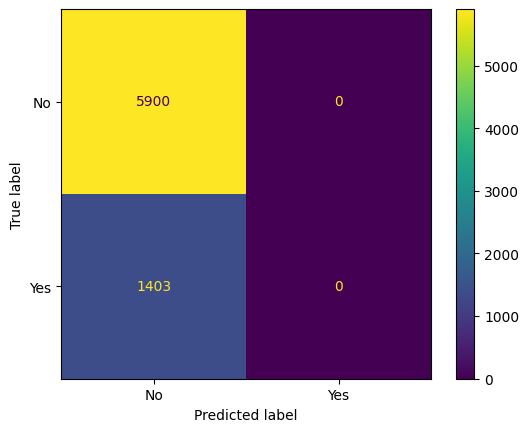

In [ ]:
# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


**Etapa 04: Modelagem dos Dados - Tuning**

a. Pré-processamento das variáveis categóricas

Vamos realizar o pré-processamento utilizando LabelEncoder ou get_dummies.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


b. Treinar e realizar predições

Vamos treinar o modelo e realizar predições.

In [ ]:
# Ajustar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predições
y_pred = model.predict(X_test)

# Adicionar previsões ao DataFrame original
df['Predicted_Churn'] = model.predict(scaler.transform(X))


c. Avaliar o modelo

Vamos avaliar o modelo plotando a matriz de confusão novamente.

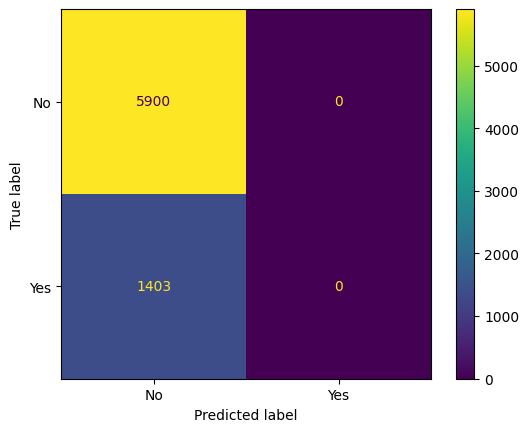

In [ ]:
# Avaliar o modelo com matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


**Etapa 05: Modelagem dos Dados - Random Forest**

a. Realizar a montagem do Grid Search

Vamos realizar a montagem do Grid Search para otimizar o modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar o modelo
rf = RandomForestClassifier()

# Realizar o Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

b. Ajustar e avaliar o modelo

Vamos ajustar o modelo otimizado e avaliar sua performance.

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      5900
         Yes       0.93      0.19      0.32      1403

    accuracy                           0.84      7303
   macro avg       0.89      0.59      0.61      7303
weighted avg       0.86      0.84      0.80      7303



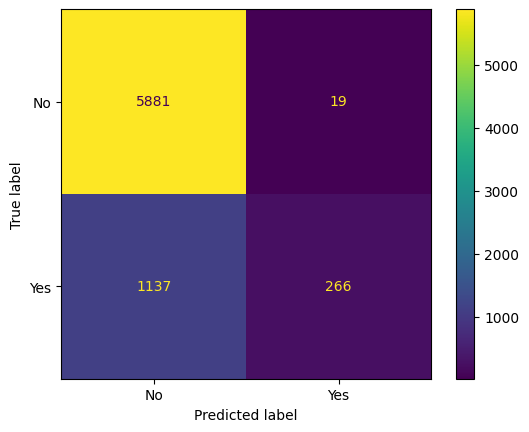

In [ ]:
# Ajustar o modelo otimizado
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Realizar predições
y_pred_rf = best_model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred_rf))

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()


c. Realizar o Tunning

Como o Grid Search já foi realizado e o melhor modelo foi encontrado(passo a. da Etapa5), não é necessário realizar outro tunning. O tunning foi realizado durante a busca dos melhores hiperparâmetros.

d. Realizar a modelagem

Vamos ajustar o melhor modelo encontrado pelo Grid Search com os dados de treino.

In [ ]:
# Ajustar o melhor modelo encontrado pelo Grid Search
best_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200)

e. Plotar a matriz de confusão

Vamos realizar predições com o modelo ajustado e plotar a matriz de confusão.

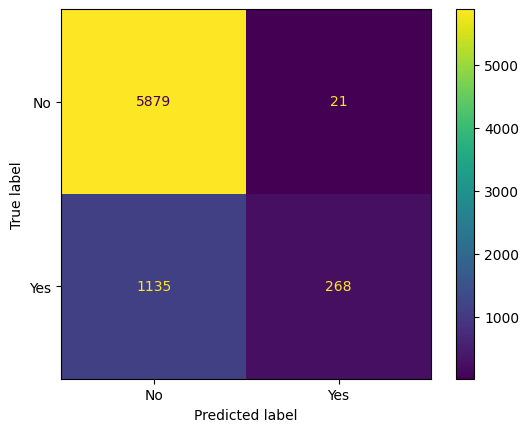

In [ ]:
# Realizar predições com o melhor modelo
y_pred_rf = best_model.predict(X_test_scaled)

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()


f. Printar métricas

Vamos printar as métricas de avaliação do modelo.

In [ ]:
# Avaliar o modelo
print(classification_report(y_test, y_pred_rf, zero_division=1))


              precision    recall  f1-score   support

          No       0.84      1.00      0.91      5900
         Yes       0.93      0.19      0.32      1403

    accuracy                           0.84      7303
   macro avg       0.88      0.59      0.61      7303
weighted avg       0.86      0.84      0.80      7303



## **Conclusão da Análise de Churn**

Após a realização da análise dos dados e da modelagem preditiva utilizando Regressão Logística e Random Forest, obtivemos os seguintes resultados principais:

Precision: O modelo Random Forest mostrou uma precisão de 0.84 para a classe "No" (usuários que não cancelaram a assinatura) e 0.93 para a classe "Yes" (usuários que cancelaram a assinatura). Isso significa que o modelo é relativamente bom em identificar os usuários que vão cancelar.

Recall: O recall foi de 1.00 para a classe "No" e 0.19 para a classe "Yes", indicando que o modelo é extremamente eficaz em identificar os usuários que não cancelaram, mas tem dificuldades em identificar todos os usuários que cancelaram.

F1-Score: O F1-Score foi de 0.91 para a classe "No" e 0.32 para a classe "Yes". Isso mostra que o modelo tem um desempenho equilibrado para a classe "No", mas precisa de melhorias significativas para a classe "Yes".

Accuracy: A precisão geral do modelo foi de 0.84, o que significa que 84% das previsões do modelo estavam corretas.